# Import Libraries
Includes
* scipy
* numpy
* matplotlib
* pandas
* sklearn

In [105]:
import scipy
import numpy
import matplotlib
import pandas

import sklearn
from sklearn import model_selection # for splitting into train and test
from sklearn import linear_model # for logistic model
from sklearn import discriminant_analysis # for LinearDiscriminantAnalysis model
from sklearn import tree # for decision tree
from sklearn import naive_bayes

# Read Data

In [328]:
dataset=pandas.read_csv('Data/iris.data.txt', names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class'])

# Summarize the Dataset

In this step we are going to take a look at the data a few different ways:

1. Dimensions of the dataset.
2. Look at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.

In [25]:
# 1. Dimensions of Dataset
print(dataset.shape)

(150, 5)


In [27]:
# 2. Look at the data itself.
display(dataset.head(10))

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [29]:
# 3. Statistical Summary
display(dataset.describe()) # it will identify numeric data automatically

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
# 4. Class Distribution
print(dataset.groupby('Class').size())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Data Visualization

We are going to look at two types of plots:

1. Univariate plots to better understand each attribute.
2. Multivariate plots to better understand the relationships between attributes.

 ### Univariate Plots

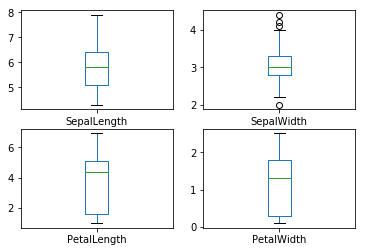

In [37]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
matplotlib.pyplot.show()

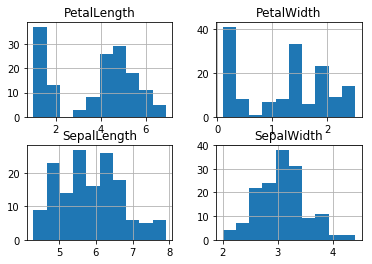

In [38]:
# histograms
dataset.hist()
matplotlib.pyplot.show()

### Multivariate Plots

Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


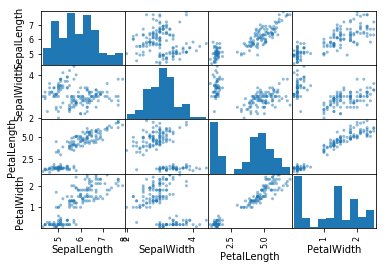

In [41]:
# scatter plot matrix
pandas.scatter_matrix(dataset)
matplotlib.pyplot.show()

# Evaluate Some Algorithms

Here is what we are going to cover in this step:

1. Separate out a validation dataset.
2. Build 5 different models to predict species from flower measurements
3. Select the best model.

### 1. Create a Validation Dataset

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [148]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 100
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [53]:
seed = 100

### 2. Build Models

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).


This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

In [200]:
# Algorithms
model_LR=sklearn.linear_model.LogisticRegression()
model_LDA=sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
model_KNN= sklearn.neighbors.KNeighborsClassifier()
model_CART=sklearn.tree.DecisionTreeClassifier()
model_NB=sklearn.naive_bayes.GaussianNB()
model_SVM=sklearn.svm.SVC()

#### Fitting Model

In [282]:
model_LR.fit(X_train,Y_train)
model_LDA.fit(X_train,Y_train)
model_KNN.fit(X_train,Y_train)
model_CART.fit(X_train,Y_train)
model_NB.fit(X_train,Y_train)
model_SVM.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Making Predictions

In [151]:
# for Train dataset
trainResult_LR=model_LR.predict(X_train)
trainResult_LDA=model_LDA.predict(X_train)
trainResult_KNN=model_KNN.predict(X_train)
trainResult_CART=model_CART.predict(X_train)
trainResult_NB=model_NB.predict(X_train)
trainResult_SVM=model_SVM.predict(X_train)


# for test dataset
testResult_LR=model_LR.predict(X_test)
testResult_LDA=model_LDA.predict(X_test)
testResult_KNN=model_KNN.predict(X_test)
testResult_CART=model_CART.predict(X_test)
testResult_NB=model_NB.predict(X_test)
testResult_SVM=model_SVM.predict(X_test)



#### Combine result of all models

In [153]:
trainResult=pandas.DataFrame([Y_train,trainResult_LR,trainResult_LDA,trainResult_KNN,trainResult_CART,trainResult_NB,trainResult_SVM]).T
trainResult.columns=['Actual','LR','LDA','KNN','CART','NB','SVM']
display(result.head(10))

,Actual,LR,LDA,KNN,CART,NB,SVM
0,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
4,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
6,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


### 3. Evaluation
1. Accuracy score
2. Confusion Matrix
3. Classification Report


#### Logistic Regression Evaluation

In [156]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_LR))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_LR))
print(sklearn.metrics.classification_report(Y_train, trainResult_LR))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_LR))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_LR))
print(sklearn.metrics.classification_report(Y_test, testResult_LR))

0.975
[[43  0  0]
 [ 0 35  3]
 [ 0  0 39]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       1.00      0.92      0.96        38
 Iris-virginica       0.93      1.00      0.96        39

    avg / total       0.98      0.97      0.97       120

--------------------------------------------------------------
0.8
[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

    avg / total       0.83      0.80      0.80        30



#### Linear Discriminant Analysis (LDA) Evaluation

In [158]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_LDA))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_LDA))
print(sklearn.metrics.classification_report(Y_train, trainResult_LDA))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_LDA))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_LDA))
print(sklearn.metrics.classification_report(Y_test, testResult_LDA))

0.9833333333333333
[[43  0  0]
 [ 0 37  1]
 [ 0  1 38]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.97      0.97      0.97        38
 Iris-virginica       0.97      0.97      0.97        39

    avg / total       0.98      0.98      0.98       120

--------------------------------------------------------------
0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30



#### K-Nearest Neighbors (KNN) Evaluation

In [161]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_KNN))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_KNN))
print(sklearn.metrics.classification_report(Y_train, trainResult_KNN))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_KNN))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_KNN))
print(sklearn.metrics.classification_report(Y_test, testResult_KNN))

0.9833333333333333
[[43  0  0]
 [ 0 36  2]
 [ 0  0 39]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       1.00      0.95      0.97        38
 Iris-virginica       0.95      1.00      0.97        39

    avg / total       0.98      0.98      0.98       120

--------------------------------------------------------------
0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



#### Classification and Regression Trees (CART) Evaluation

Decision tree has overfitted the training dataset. 100% accuracy in train dataset and low accuracy in test dataset.

In [164]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_CART))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_CART))
print(sklearn.metrics.classification_report(Y_train, trainResult_CART))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_CART))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_CART))
print(sklearn.metrics.classification_report(Y_test, testResult_CART))

1.0
[[43  0  0]
 [ 0 38  0]
 [ 0  0 39]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       1.00      1.00      1.00        38
 Iris-virginica       1.00      1.00      1.00        39

    avg / total       1.00      1.00      1.00       120

--------------------------------------------------------------
0.8666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  3  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.79      0.92      0.85        12
 Iris-virginica       0.89      0.73      0.80        11

    avg / total       0.87      0.87      0.87        30



#### Gaussian Naive Bayes (NB) Evaluation

In [171]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_NB))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_NB))
print(sklearn.metrics.classification_report(Y_train, trainResult_NB))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_NB))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_NB))
print(sklearn.metrics.classification_report(Y_test, testResult_NB))

0.9833333333333333
[[43  0  0]
 [ 0 38  0]
 [ 0  2 37]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.95      1.00      0.97        38
 Iris-virginica       1.00      0.95      0.97        39

    avg / total       0.98      0.98      0.98       120

--------------------------------------------------------------
0.8333333333333334
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

    avg / total       0.84      0.83      0.83        30



#### Support Vector Machines (SVM) Evaluation

In [169]:
# Train

print(sklearn.metrics.accuracy_score(Y_train, trainResult_SVM))
print(sklearn.metrics.confusion_matrix(Y_train, trainResult_SVM))
print(sklearn.metrics.classification_report(Y_train, trainResult_SVM))
print('--------------------------------------------------------------')

# Test
print(sklearn.metrics.accuracy_score(Y_test, testResult_SVM))
print(sklearn.metrics.confusion_matrix(Y_test, testResult_SVM))
print(sklearn.metrics.classification_report(Y_test, testResult_SVM))

0.9916666666666667
[[43  0  0]
 [ 0 37  1]
 [ 0  0 39]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       1.00      0.97      0.99        38
 Iris-virginica       0.97      1.00      0.99        39

    avg / total       0.99      0.99      0.99       120

--------------------------------------------------------------
0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



# Result

Accuracy for train and test
    * LR   - 0.97 and 0.80
    * LDA  - 0.98 and 0.96
    * KNN  - 0.98 and 0.90
    * CART - 1.00 and 0.86
    * NB   - 0.98 and 0.83
    * SVM  - 0.99 and 0.93
     

CART seems overfitted to training dataset.
Also LR, KNN, NB has high accuracy for Train dataset and low accuracy for test dataset.

# Cross Validation (with 10 folds)


We will use 10-fold cross validation to estimate accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

In [278]:
# Toy Example to see how cross validation works
X_data=[1,2,3,4,5,6,7,8,9,0]
Y_data=[10,20,30,40,50,60,70,80,90,00]
kfold = sklearn.model_selection.KFold(n_splits=4, random_state=seed)
for train, test in kfold.split(X_data,Y_data):
    print('train: %s, test: %s' % (train, test))

train: [3 4 5 6 7 8 9], test: [0 1 2]
train: [0 1 2 6 7 8 9], test: [3 4 5]
train: [0 1 2 3 4 5 8 9], test: [6 7]
train: [0 1 2 3 4 5 6 7], test: [8 9]


In [267]:
kfold = sklearn.model_selection.KFold(n_splits=10, random_state=seed)
cvTestResults_LR = sklearn.model_selection.cross_val_predict(model_LR, X_train,Y_train, cv=kfold)
print(sklearn.metrics.accuracy_score(Y_train, cvTestResults_LR))

0.9666666666666667


In [268]:
cv_results = sklearn.model_selection.cross_val_score(model_LR, X_train, Y_train, cv=kfold, scoring='accuracy')
print(cv_results.mean())

0.9666666666666666


In [276]:
# evaluate each model in turn
# cross validation
models = [model_LR,model_LDA, model_KNN,model_CART,model_NB,model_SVM]
names=['LR  ','LDA ','KNN ','CART','NB  ','SVM ']
for name,model in zip(names,models):
    kfold = sklearn.model_selection.KFold(n_splits=10, random_state=seed)
    cv_results_train = sklearn.model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    cv_results_test = sklearn.model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring='accuracy')
    msg = "%s - %f %f" % (name,cv_results_train.mean(), cv_results_test.mean())
    print(msg)

LR   - 0.966667 0.833333
LDA  - 0.975000 0.966667
KNN  - 0.983333 0.900000
CART - 0.975000 0.800000
NB   - 0.975000 0.800000
SVM  - 0.991667 0.900000


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


#### Linear discriminant analysis works well on this dataset 